In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Setup data
data = pd.read_csv(f"../generated/benchmark.csv", sep=',')
data = data.groupby(['directory', 'type']).agg({'duration': 'median', 'actions': 'first', 'added': 'first', 'deleted': 'first', 'unchanged': 'first', 'updated': 'first', 'moved_unchanged': 'first', 'moved_updated': 'first', 'lines-left': 'first', 'lines-right': 'first', 'similar-groups': 'first'}).reset_index()
data['moved'] = data["moved_unchanged"] + data['moved_updated']

normalized2 = data.copy()
def normalize(df, key):
	df[key] = normalized2.apply((lambda row: row[key] / (row['lines-left'] + row['lines-right'])), axis=1)
for key in ["actions", "added", "deleted", "unchanged", "updated", "moved", "similar-groups"]:
	normalize(normalized2, key)

# Actions

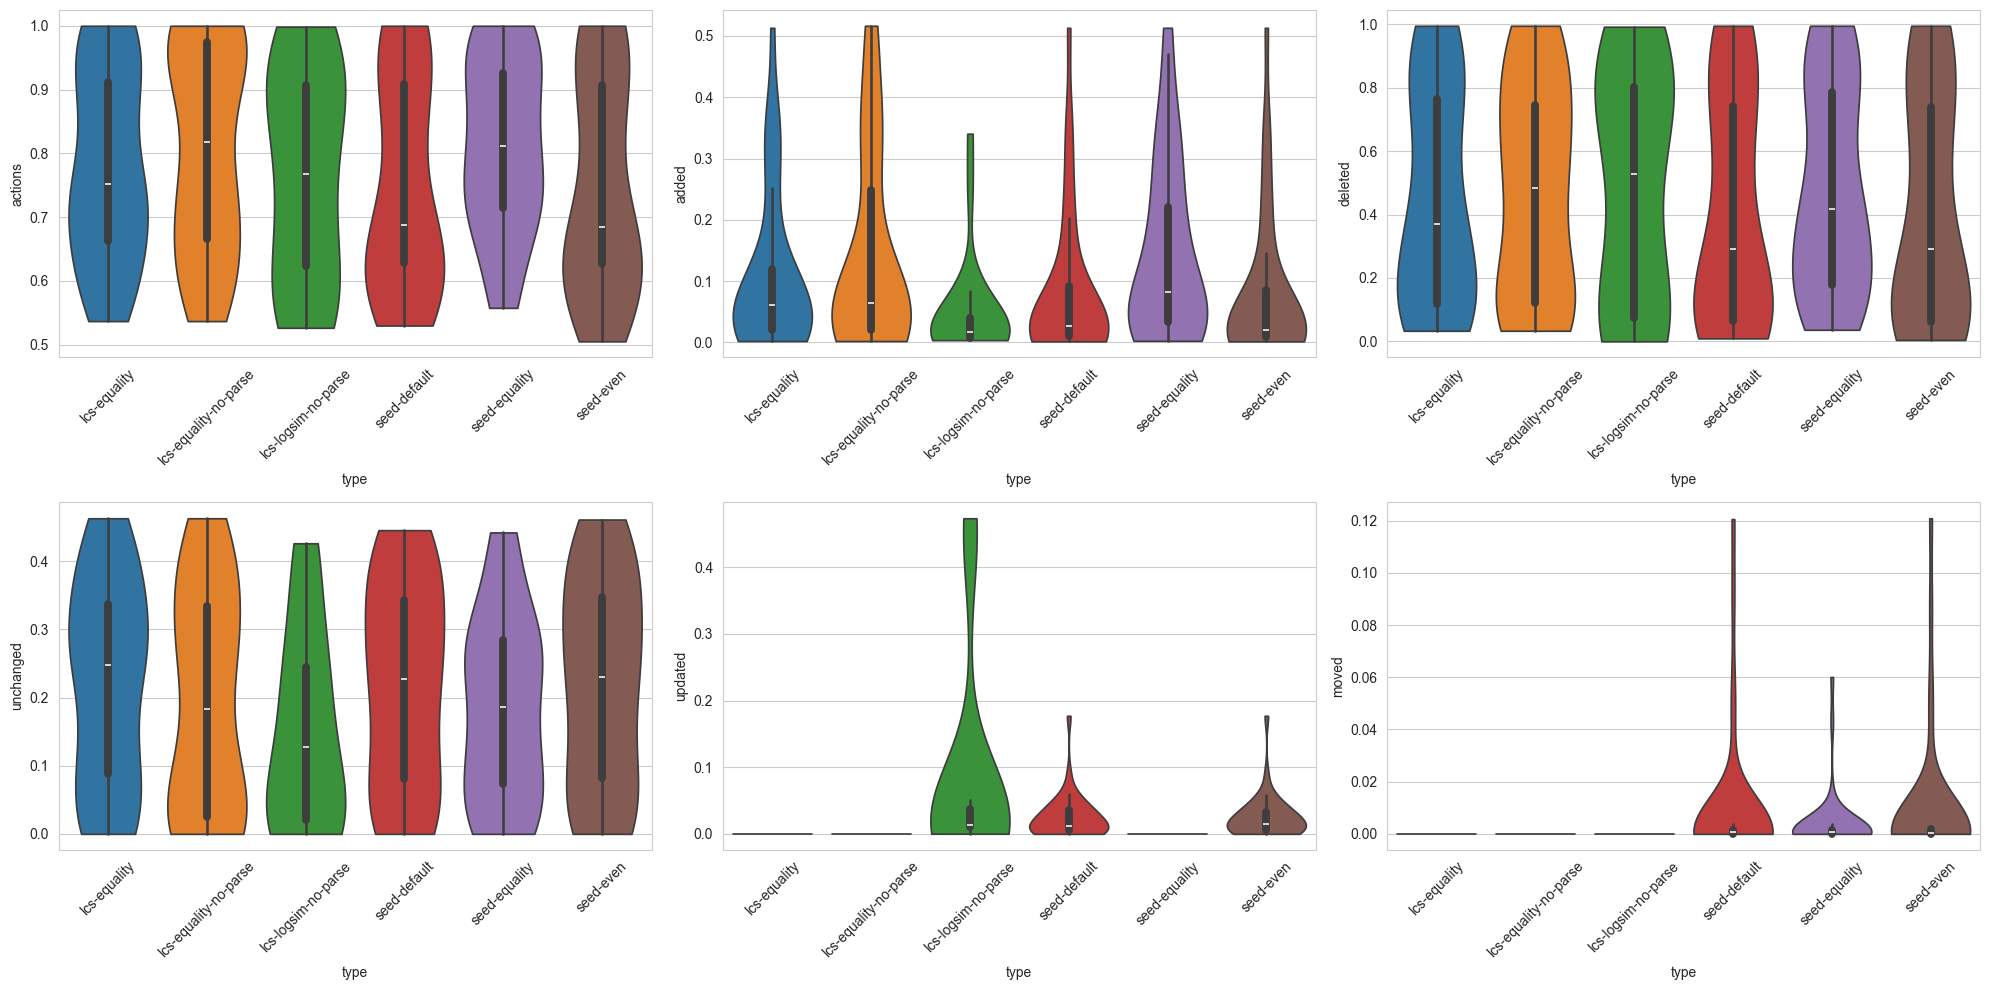

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
normalized2 = normalized2[normalized2["type"] in ("lcs-equality", "lcs-equality-no-parse", "lcs-logsim-no-parse", "seed-default", "seed-even")]
sns.violinplot(data=normalized2, x="type", y="actions", hue="type", cut=0, ax=axes[0, 0])
sns.violinplot(data=normalized2, x="type", y="added", hue="type", cut=0, ax=axes[0, 1])
sns.violinplot(data=normalized2, x="type", y="deleted", hue="type", cut=0, ax=axes[0, 2])
sns.violinplot(data=normalized2, x="type", y="unchanged", hue="type", cut=0, ax=axes[1, 0])
sns.violinplot(data=normalized2, x="type", y="updated", hue="type", cut=0, ax=axes[1, 1])
sns.violinplot(data=normalized2, x="type", y="moved", hue="type", cut=0, ax=axes[1, 2])
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
normalized2 = normalized2[normalized2["type"] in ("seed-default", "seed-equality", "seed-levenshtein", "seed-cosine", "seed-monge_elkman", "seed-smith_waterman", "seed-jaccard")]
sns.violinplot(data=normalized2, x="type", y="actions", hue="type", cut=0, ax=axes[0, 0])
sns.violinplot(data=normalized2, x="type", y="added", hue="type", cut=0, ax=axes[0, 1])
sns.violinplot(data=normalized2, x="type", y="deleted", hue="type", cut=0, ax=axes[0, 2])
sns.violinplot(data=normalized2, x="type", y="unchanged", hue="type", cut=0, ax=axes[1, 0])
sns.violinplot(data=normalized2, x="type", y="updated", hue="type", cut=0, ax=axes[1, 1])
sns.violinplot(data=normalized2, x="type", y="moved", hue="type", cut=0, ax=axes[1, 2])
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

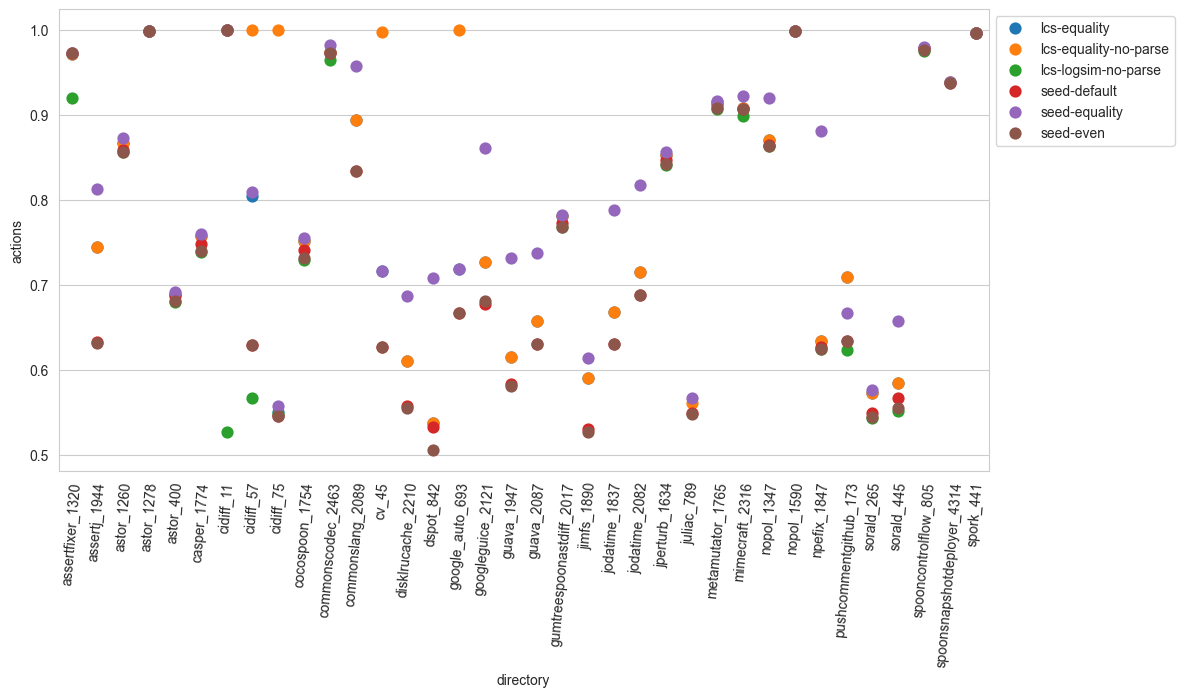

In [8]:
plt.figure(figsize=(12,6))
g = sns.pointplot(data=normalized2, x="directory", hue="type", y="actions", linestyles="")
g.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=85)
plt.show()

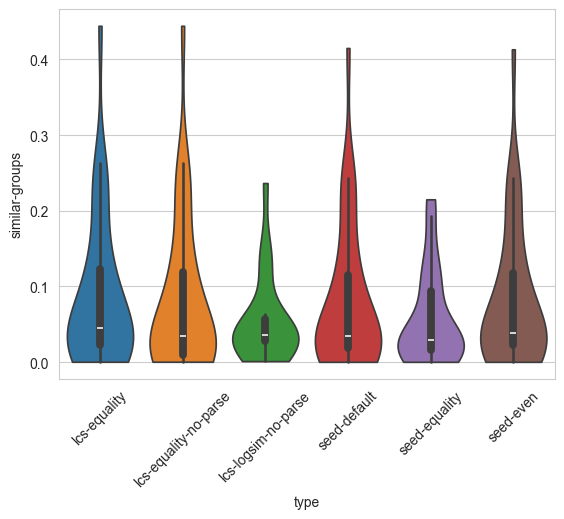

In [10]:
sns.violinplot(data=normalized2, x="type", y="similar-groups", hue="type", cut=0)
plt.xticks(rotation=45)
plt.show()

# Durations

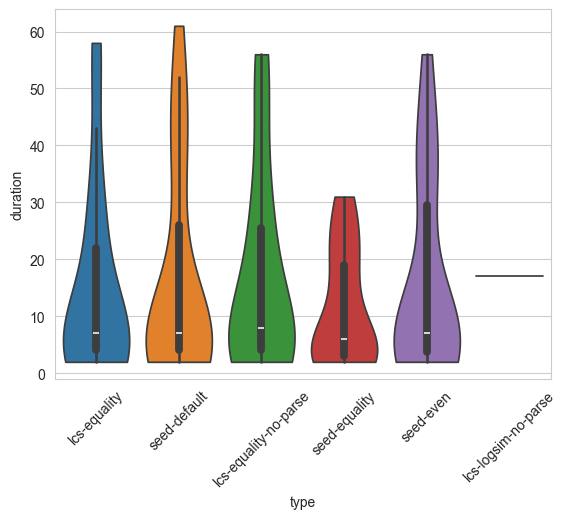

In [16]:
# normalized["duration"] = (normalized["duration"] - normalized["duration"].min()) / (normalized["duration"].max() - normalized["duration"].min())
no_outliers = data[data["duration"].between(data["duration"].quantile(0.25), data["duration"].quantile(0.75))]
sns.violinplot(data=no_outliers, x="type", hue="type", y="duration", cut=0)
plt.xticks(rotation=45)
plt.show()

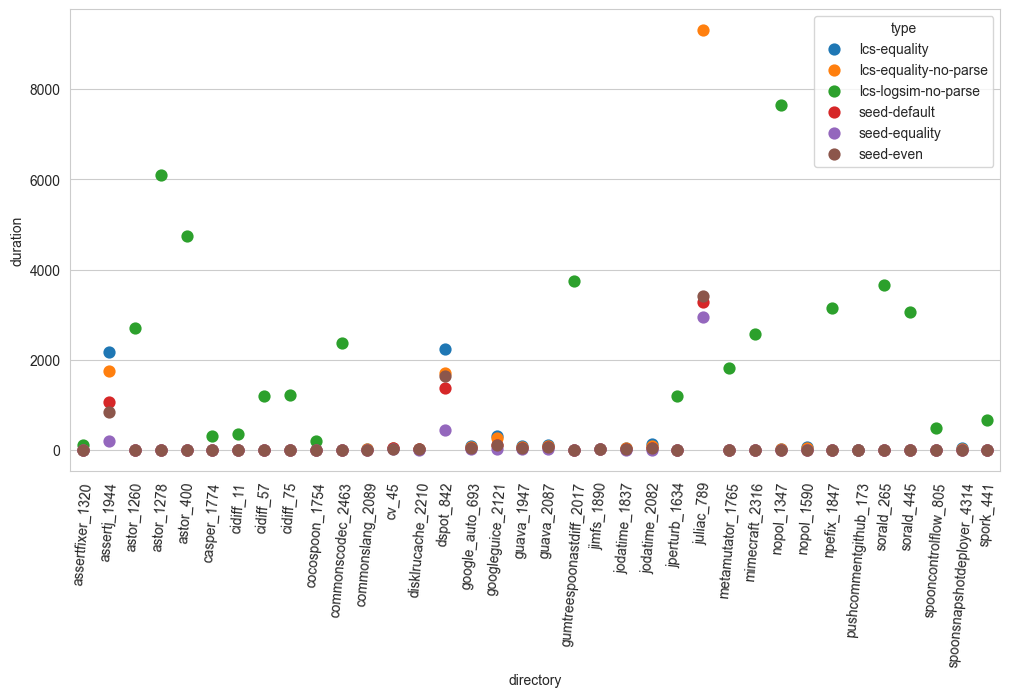

In [13]:
plt.figure(figsize=(12,6))
sns.pointplot(data=data, x="directory", hue="type", y="duration", linestyles="")
plt.xticks(rotation=85)
plt.show()